# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing data set

In [2]:
d=pd.read_csv('C:/DAML/Income-Classification/Data Set/ICclean.csv')

## Handle categorical variables with numerically coded values

In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  income          30162 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.8+ MB


### Of all the 14 attributes, converting object data type into categorical data type

In [4]:
d.replace(' Male','0',inplace=True)

In [5]:
d.replace(' Female','1',inplace=True)

In [6]:
d['sex'] = d.income.astype(int)

In [7]:
d['race'] = d['race'].replace({' Black': 0, ' Asian-Pac-Islander': 1,' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

In [8]:
d['marital-status'] = d['marital-status'].map({' Married-spouse-absent': 0, ' Widowed': 1, ' Married-civ-spouse': 2, ' Separated': 3, ' Divorced': 4,' Never-married': 5, ' Married-AF-spouse': 6}).astype(int)

In [9]:
d['workclass'] = d['workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)

In [10]:
d['education'] = d['education'].map({' Some-college': 0, ' Preschool': 1, ' 5th-6th': 2, ' HS-grad': 3, ' Masters': 4, ' 12th': 5, ' 7th-8th': 6, ' Prof-school': 7,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14,' 9th': 15}).astype(int)

In [11]:
d['occupation'] = d['occupation'].map({ ' Farming-fishing': 1, ' Tech-support': 2, ' Adm-clerical': 3, ' Handlers-cleaners': 4, 
 ' Prof-specialty': 5,' Machine-op-inspct': 6, ' Exec-managerial': 7,' Priv-house-serv': 8,' Craft-repair': 9,' Sales': 10, ' Transport-moving': 11, ' Armed-Forces': 12, ' Other-service': 13,' Protective-serv':14}).astype(int)

In [12]:
d['relationship'] = d['relationship'].map({' Not-in-family': 0, ' Wife': 1, ' Other-relative': 2, ' Unmarried': 3,' Husband': 4,' Own-child': 5}).astype(int)

In [13]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  int32 
 2   education       30162 non-null  int32 
 3   education-num   30162 non-null  int64 
 4   marital-status  30162 non-null  int32 
 5   occupation      30162 non-null  int32 
 6   relationship    30162 non-null  int32 
 7   race            30162 non-null  int32 
 8   sex             30162 non-null  int32 
 9   hours-per-week  30162 non-null  int64 
 10  native-country  30162 non-null  object
 11  income          30162 non-null  int64 
dtypes: int32(7), int64(4), object(1)
memory usage: 2.0+ MB


In [14]:
d.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,1,12,13,5,3,0,3,0,40,United-States,0
1,50,6,12,13,2,7,4,3,0,13,United-States,0
2,38,5,3,9,4,4,0,3,0,40,United-States,0
3,53,5,11,7,2,4,4,0,0,40,United-States,0
4,28,5,12,13,2,5,1,0,0,40,Cuba,0


## Perform univariate and bivariate analysis and derive meaningful insights about the dataset

#### 'age' attribute

Text(0, 0.5, 'FREQUENCY')

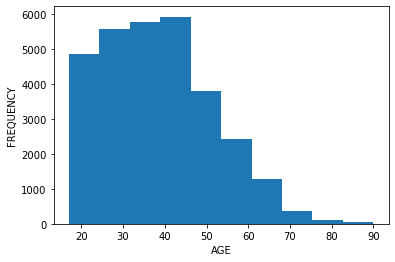

In [15]:
d['age'].plot.hist()
plt.xlabel('AGE')
plt.ylabel('FREQUENCY')

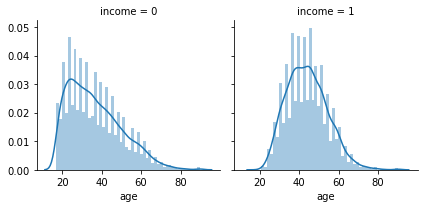

In [16]:
g=sns.FacetGrid(d,col='income')
g=g.map(sns.distplot,"age")
plt.show()

#### Taking workclass attribute

Text(0, 0.5, 'FREQUENCY')

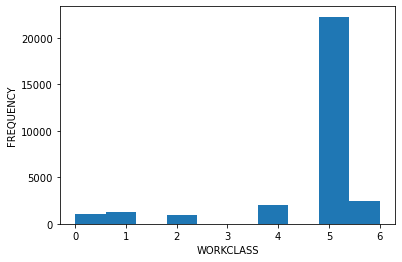

In [17]:
d['workclass'].plot.hist()
plt.xlabel('WORKCLASS')
plt.ylabel('FREQUENCY')

C:\Users\Animish\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


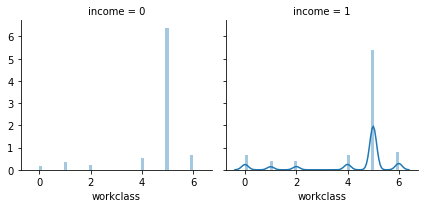

In [18]:
g1=sns.FacetGrid(d,col='income')
g1=g1.map(sns.distplot,"workclass")
plt.show()

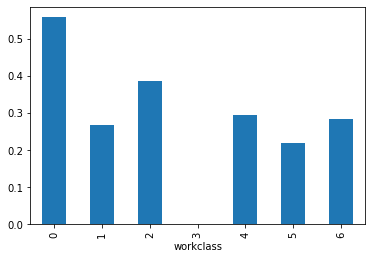

In [19]:
d.groupby('workclass').income.mean().plot(kind='bar')

#### 'education' attribute

Text(0, 0.5, 'FREQUENCY')

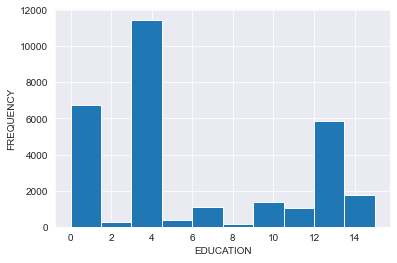

In [20]:
sns.set_style('darkgrid')
d['education'].plot(kind='hist',stacked=True)
plt.xlabel('EDUCATION')
plt.ylabel('FREQUENCY')

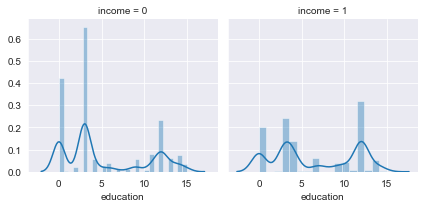

In [21]:
g1=sns.FacetGrid(d,col='income')
g1=g1.map(sns.distplot,"education")
plt.show()

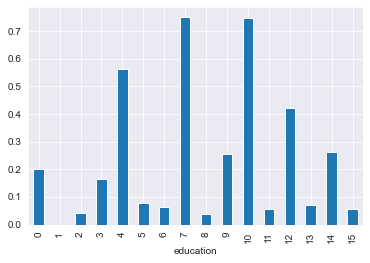

In [22]:
d.groupby('education').income.mean().plot(kind='bar')

#### 'occupation' attribute

Text(0, 0.5, 'FREQUENCY')

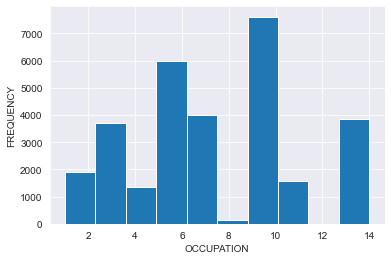

In [23]:
sns.set_style('darkgrid')
d['occupation'].plot(kind='hist',stacked=True)
plt.xlabel('OCCUPATION')
plt.ylabel('FREQUENCY')

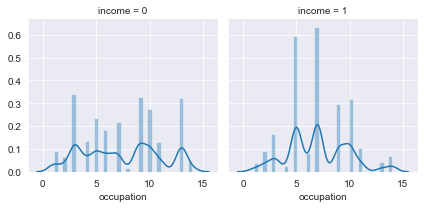

In [24]:
g1=sns.FacetGrid(d,col='income')
g1=g1.map(sns.distplot,"occupation")
plt.show()

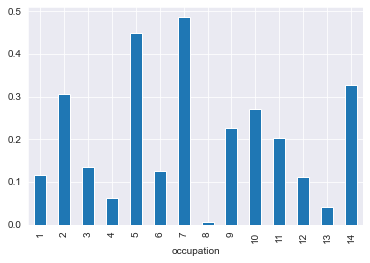

In [25]:
d.groupby('occupation').income.mean().plot(kind='bar')

#### 'sex' attribute

Text(0, 0.5, 'FREQUENCY')

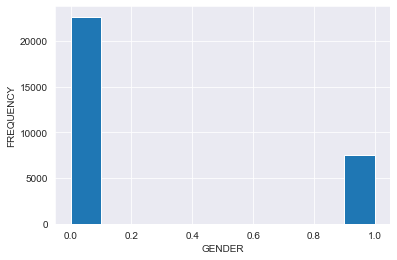

In [26]:
d['sex'].plot(kind='hist',stacked=True)
plt.xlabel('GENDER')
plt.ylabel('FREQUENCY')

#### 'hours-per-week' attribute

Text(0, 0.5, 'FREQUENCY')

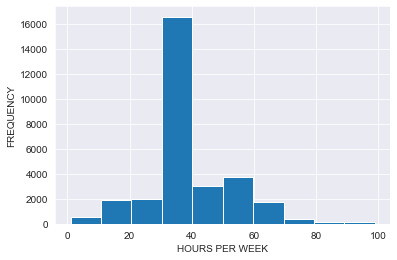

In [27]:
d['hours-per-week'].plot(kind='hist',stacked=True)
plt.xlabel('HOURS PER WEEK')
plt.ylabel('FREQUENCY')

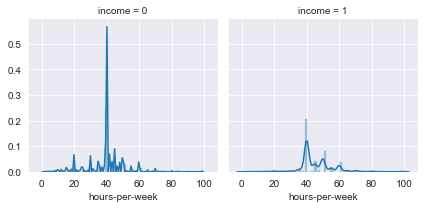

In [28]:
g1=sns.FacetGrid(d,col='income')
g1=g1.map(sns.distplot,"hours-per-week")
plt.show()

##  Identify and treat missing values and remove dataset outliers

In [29]:
from scipy import stats
from functools import reduce
z = np.abs(stats.zscore(d['hours-per-week']))
x = np.abs(stats.zscore(d['age']))
y = np.abs(stats.zscore(d['workclass']))
v = np.abs(stats.zscore(d['race']))
threshold = 3
a=np.where(z>3)
b=np.where(x>3)
c=np.where(y>3)
e=np.where(v>3)
out=reduce(np.union1d,(a,b,c,e))

In [30]:
df=d.drop(d.index[out], axis=0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28625 entries, 0 to 30160
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             28625 non-null  int64 
 1   workclass       28625 non-null  int32 
 2   education       28625 non-null  int32 
 3   education-num   28625 non-null  int64 
 4   marital-status  28625 non-null  int32 
 5   occupation      28625 non-null  int32 
 6   relationship    28625 non-null  int32 
 7   race            28625 non-null  int32 
 8   sex             28625 non-null  int32 
 9   hours-per-week  28625 non-null  int64 
 10  native-country  28625 non-null  object
 11  income          28625 non-null  int64 
dtypes: int32(7), int64(4), object(1)
memory usage: 2.1+ MB


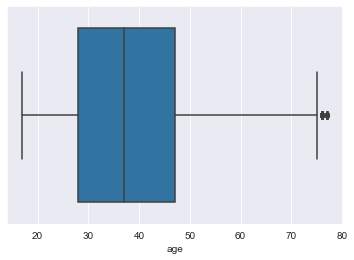

In [32]:
sns.boxplot(df['age'])

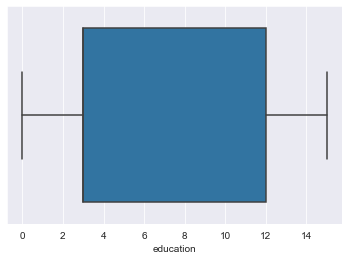

In [33]:
sns.boxplot(df['education'])

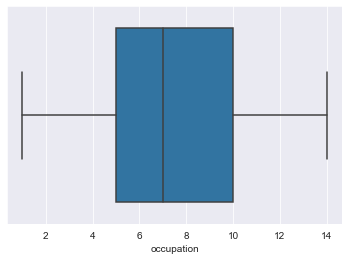

In [34]:
sns.boxplot(df['occupation'])

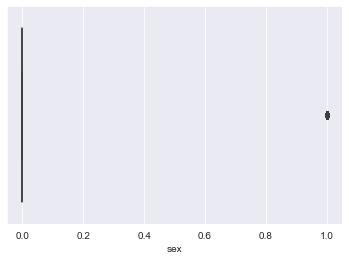

In [35]:
sns.boxplot(df['sex'])

## Build a correlation matrix to identify relevant variables ( Graph )

In [36]:
dcolumns = ["education-num", "marital-status", "relationship","race","native-country"]
f=df.drop(dcolumns, axis=1)

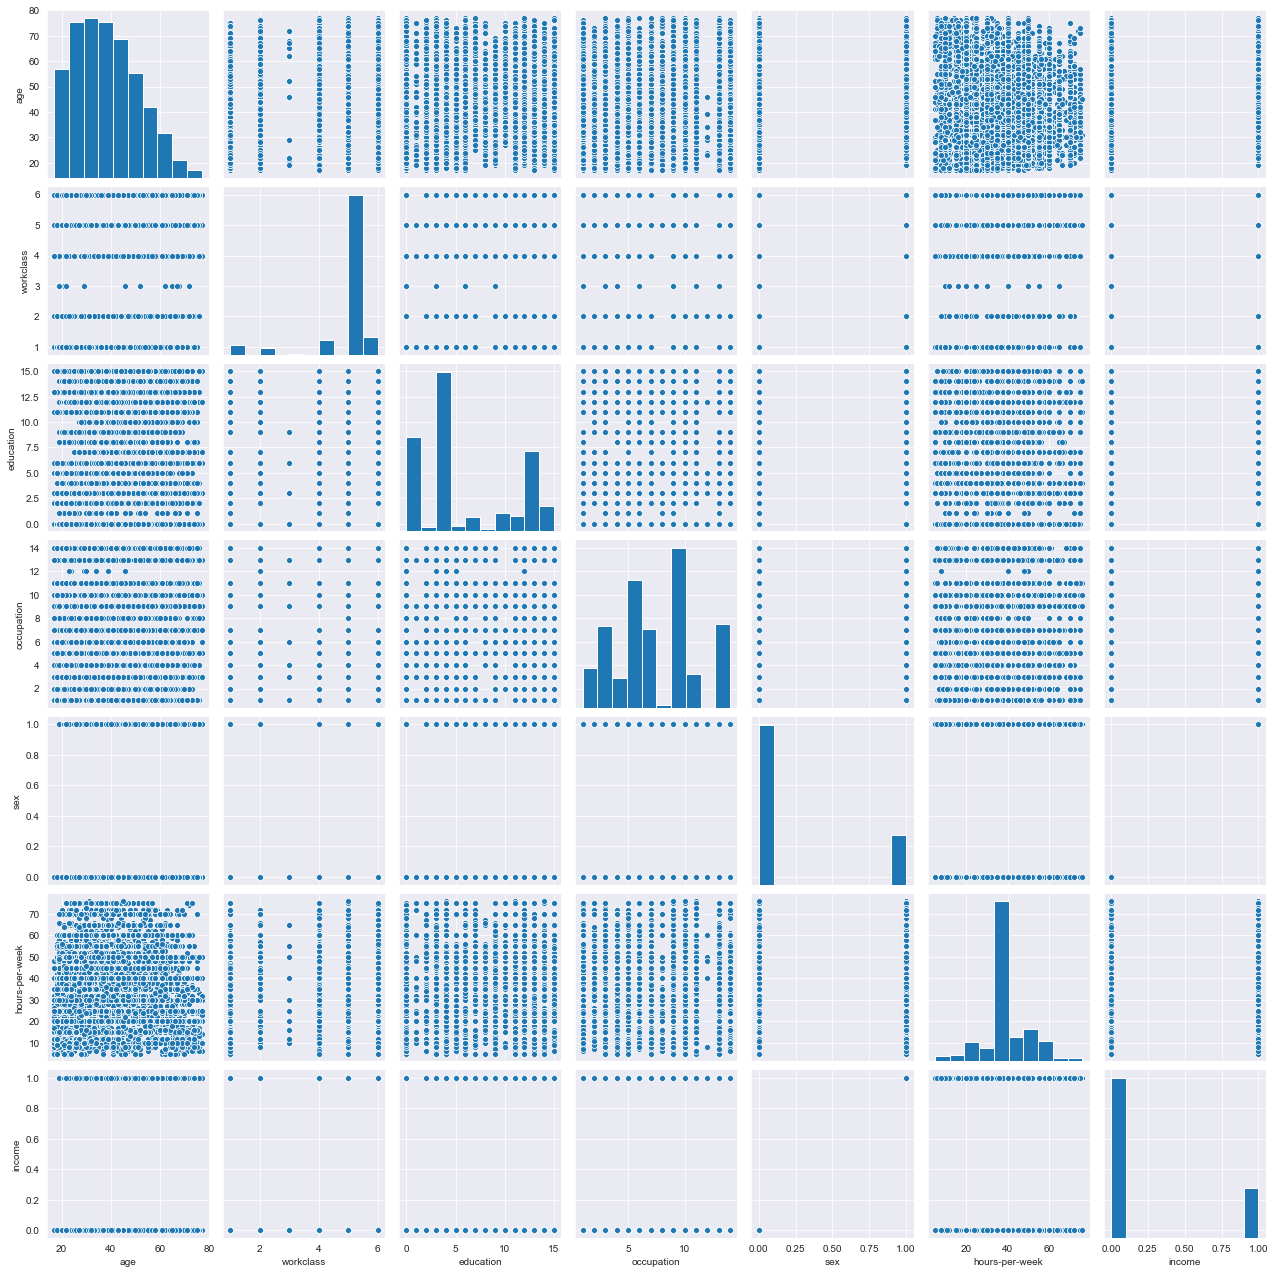

In [37]:
sns.pairplot(f)